In [1]:
import pandas as pd
import pygmt
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
geo_in=pd.read_csv('../geological_map/waor_station_geology.csv')
geo_in.head(5)

netst        stlo       stla                       geometry  index_right  \
0  CC.ASBU -121.368401  43.820560   POINT (-121.368401 43.82056)       9310.0   
1  CC.BRSP -121.708427  45.401550   POINT (-121.708427 45.40155)       5175.0   
2  CC.CARB -122.005409  46.988319  POINT (-122.005409 46.988319)        310.0   
3  CC.CIHL -121.148621  43.750969  POINT (-121.148621 43.750969)       5796.0   
4  CC.CLBH -122.143494  42.907745  POINT (-122.143494 42.907745)       5168.0   

  STATE ORIG_LABEL SGMC_LABEL UNIT_LINK  \
0    OR        Qyb      Qyb;0   ORQyb;0   
1    OR         Qa       Qa;0    ORQa;0   
2    WA         E2      EO2;0   WAEO2;0   
3    OR         Qb       Qb;0    ORQb;0   
4    OR         Qa       Qa;0    ORQa;0   

                                       UNIT_NAME  ... INDETERMIN REF_ID  \
0          Youngest basalt and basaltic andesite  ...        NaN  OR392   
1                                       Andesite  ...        NaN  OR392   
2  Lower upper Eocene marine and nonmarine rocks  ...        NaN  WA097   
3                   Basalt and basaltic andesite  ...        NaN  OR392   
4                                       Andesite  ...        NaN  OR392   

                                           REFERENCE            GENERALIZE  \
0  Miller, R.J., Raines, G.L., and Connors, K.A.,...     Igneous, volcanic   
1  Miller, R.J., Raines, G.L., and Connors, K.A.,...     Igneous, volcanic   
2  Raines, Gary L., and Johnson, Bruce R., 1996, ...  Sedimentary, clastic   
3  Miller, R.J., Raines, G.L., and Connors, K.A.,...     Igneous, volcanic   
4  Miller, R.J., Raines, G.L., and Connors, K.A.,...     Igneous, volcanic   

                                DIGITAL_UR  \
0  https://pubs.usgs.gov/of/2003/of03-067/   
1  https://pubs.usgs.gov/of/2003/of03-067/   
2  https://pubs.usgs.gov/of/1995/of95-684/   
3  https://pubs.usgs.gov/of/2003/of03-067/   
4  https://pubs.usgs.gov/of/2003/of03-067/   

                                              NGMDB1 NGMDB2 NGMDB3 RuleID  \
0  https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm    NaN    NaN    2.0   
1  https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm    NaN    NaN    2.0   
2  https://ngmdb.usgs.gov/Prodesc/proddesc_30777.htm    NaN    NaN   23.0   
3  https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm    NaN    NaN    2.0   
4  https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm    NaN    NaN    2.0   

  FIPS_C  
0   41.0  
1   41.0  
2   53.0  
3   41.0  
4   41.0  

[5 rows x 31 columns]

In [3]:
geo_df=geo_in[['netst',
               'stlo',
               'stla',
               'STATE',
               'GENERALIZE',
               'MAJOR1']]

In [4]:
geo_df2 = geo_df.dropna(subset=['stlo', 'stla', 'GENERALIZE'])

geo_colors = {
    # **Unconsolidated Rocks** (Yellow to orange gradient)
    'Unconsolidated, undifferentiated': '#FFEB3B',   # Bright yellow (light yellow)
    'Unconsolidated and Sedimentary, undifferentiated': '#FF9800',  # Orange (for undifferentiated sediments)

    # **Sedimentary Rocks** (Yellow-based to orange)
    'Sedimentary, clastic': '#FFB300',               # Amber yellow (clastic sedimentary)

    # **Igneous Rocks** (Red-based for volcanic and purple-based for intrusive)
    'Igneous, volcanic': '#D32F2F',                  # Deep red (for volcanic)
    'Igneous, intrusive': '#9C27B0',                 # Purple-based (for intrusive igneous)

    # **Metamorphic Rocks** (Green-based)
    'Metamorphic, sedimentary': '#66BB6A',           # Light green (for sedimentary metamorphics)
    'Metamorphic, schist': '#2E7D32',                # Deep green (for schist)

    # **Water** (Clear and bright color)
    'Water': '#80D8FF',                              # Soft turquoise-blue (for water)
}


# Map geological units to colors
geo_df2['color'] = geo_df2['GENERALIZE'].map(geo_colors).fillna('#d3d3d3') 


/tmp/ipykernel_504047/4009509407.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df2['color'] = geo_df2['GENERALIZE'].map(geo_colors).fillna('#d3d3d3')


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Unconsolidated, undifferentiated #FFEB3B
Unconsolidated and Sedimentary, undifferentiated #FF9800
Sedimentary, clastic #FFB300
Igneous, volcanic #D32F2F
Igneous, intrusive #9C27B0
Metamorphic, sedimentary #66BB6A
Metamorphic, schist #2E7D32
Water #80D8FF


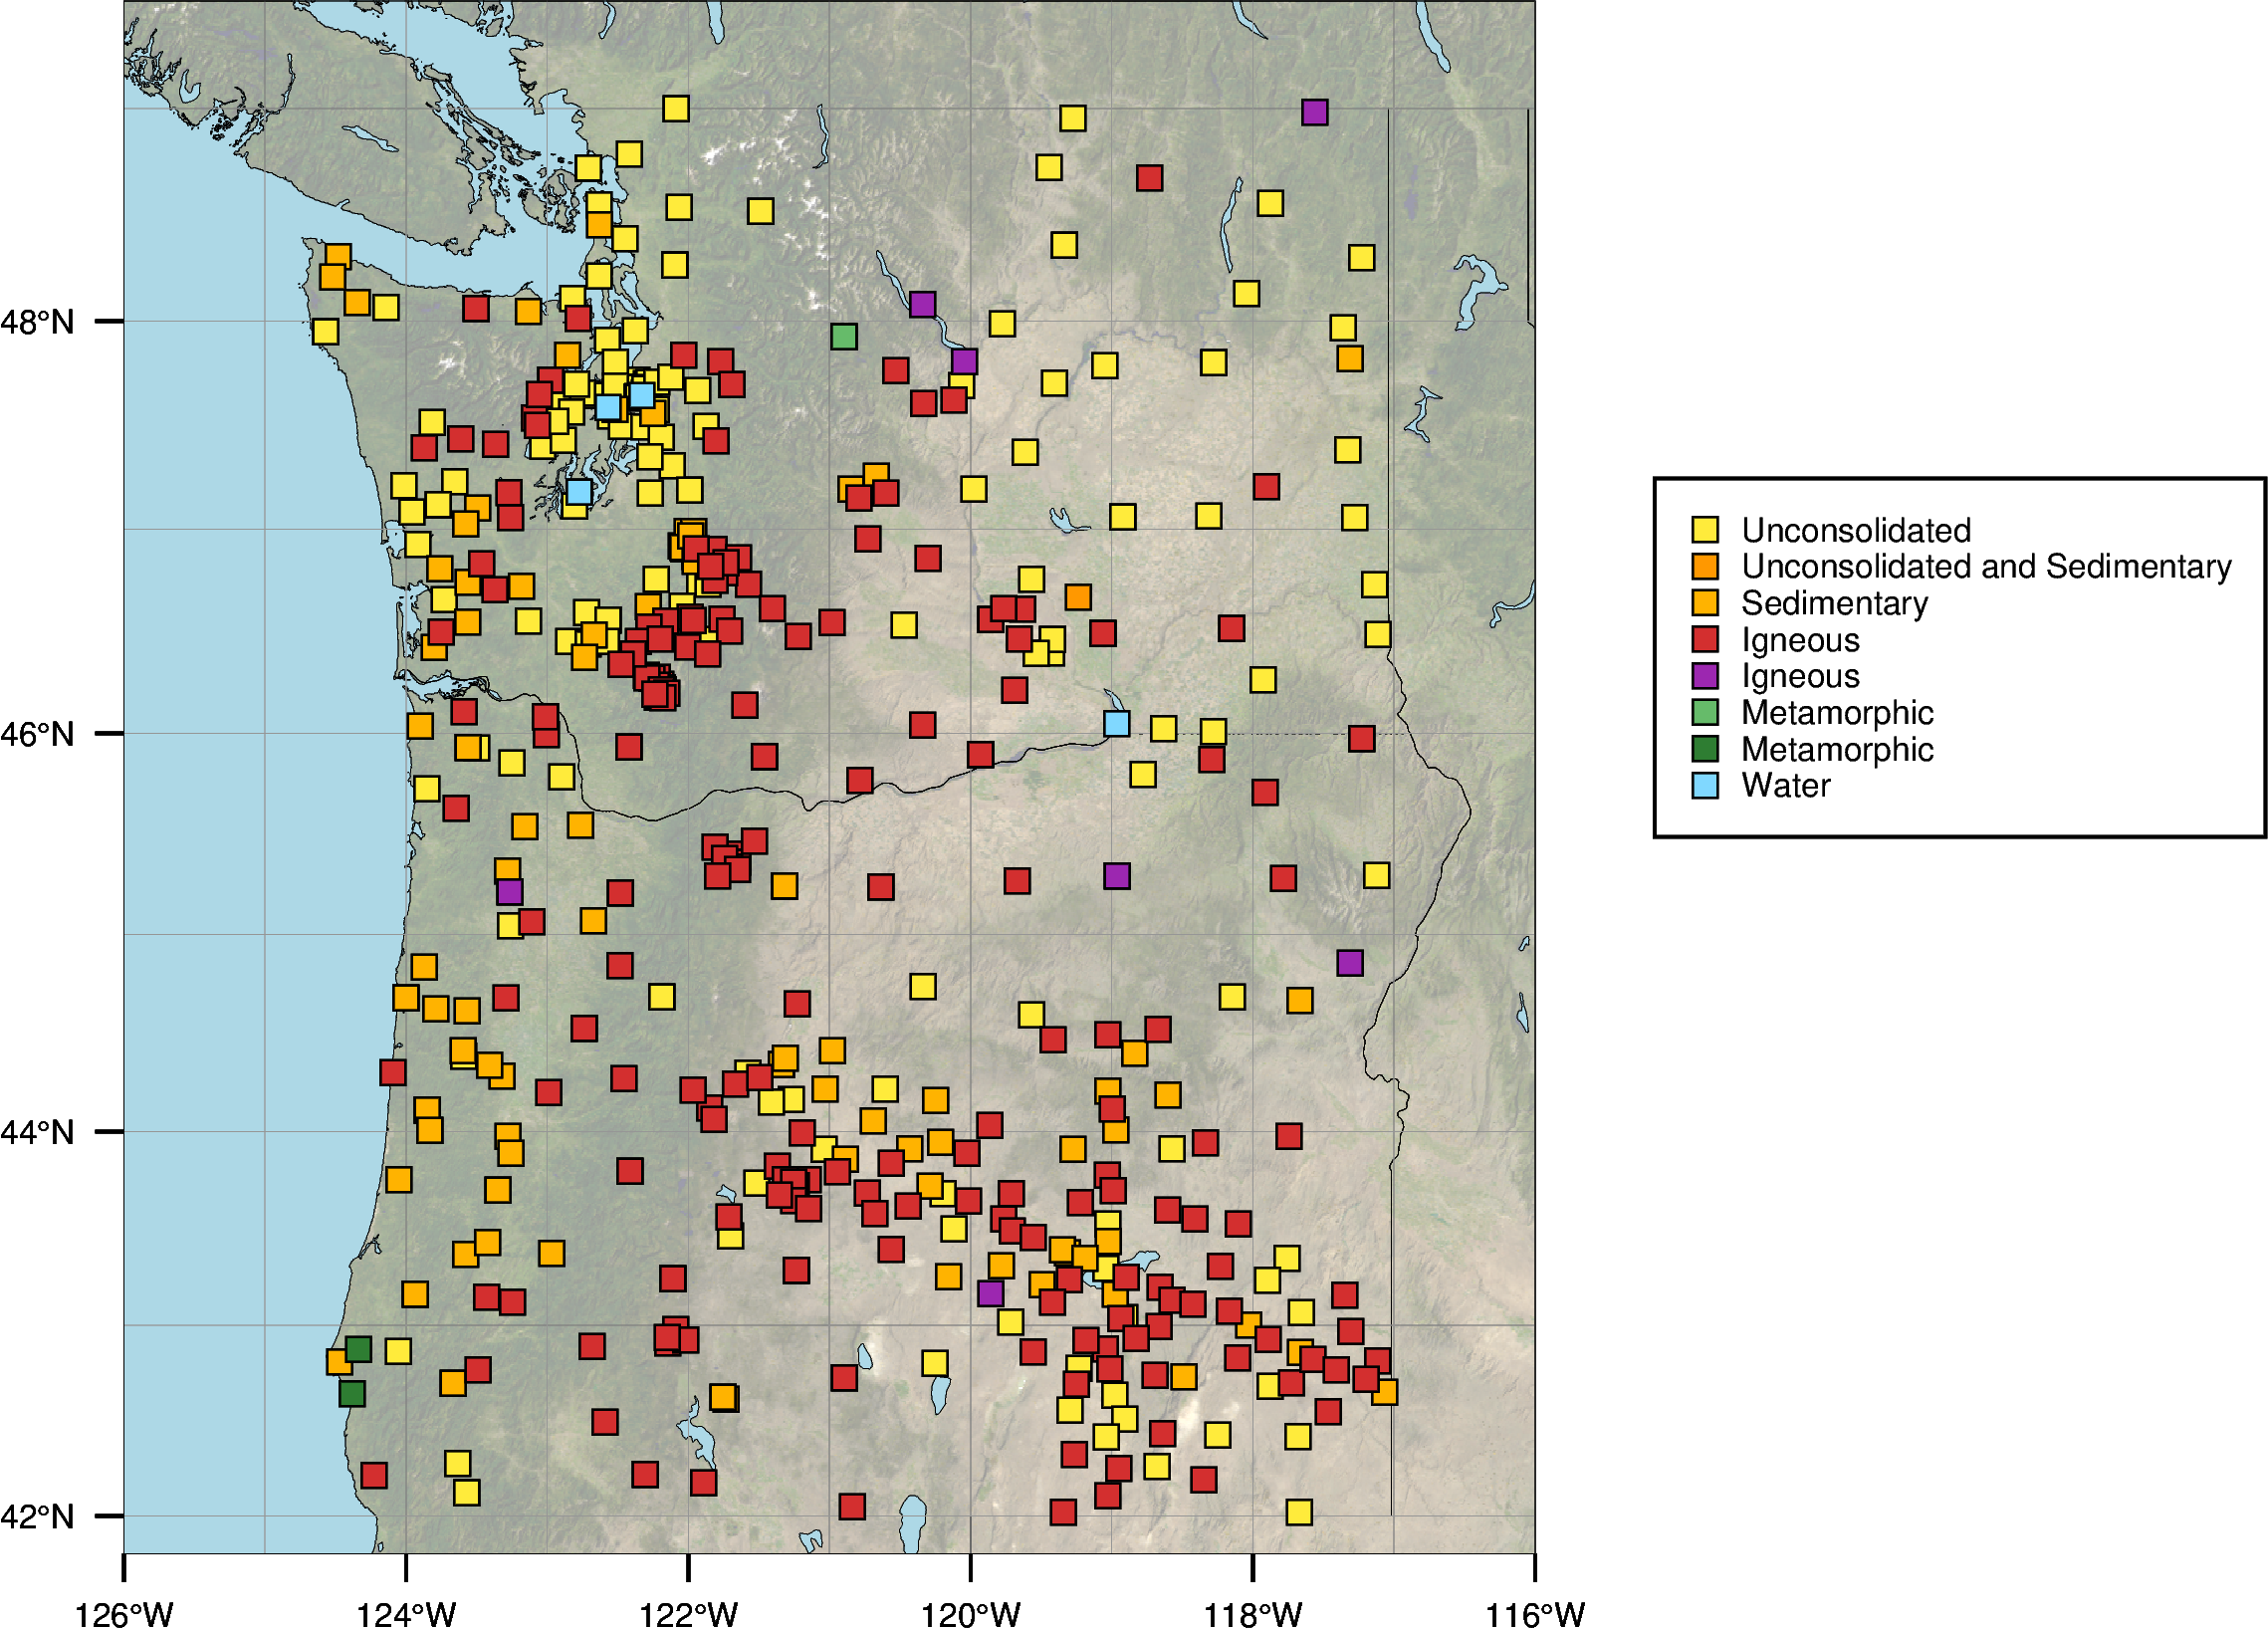

In [5]:

# PyGMT Plot
fig = pygmt.Figure()
region=[-126,-116,41.8,49.5]
proj='M6c'

pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a2g1", )
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)

# Plot each geological unit as colored circles
for unit, color in geo_colors.items():
    print(unit, color)
    geo_plot = geo_df2[geo_df2['color'] == color]
    fig.plot(
            x=geo_plot['stlo'],
            y=geo_plot['stla'],
            style="s0.15c",  
            fill=color,
            pen="black",
            label=f'{unit}'
    )

# Add the legend after plotting all points
fig.legend(position="JMR+o0.2i", box="+gwhite+p0.4p")
fig.show(dpi=600)



In [6]:
print(geo_df.MAJOR1.unique())

['Basaltic-andesite' 'Siltstone' 'Basalt' 'Rhyolite' 'Sandstone' 'Clay'
 'Silt' 'Andesite' 'Sand' 'Fine-detrital' nan 'Quartz-monzonite' 'Granite'
 'Graywacke' 'Gravel' 'Metasedimentary' 'Arkose' 'Mudstone' 'Gabbro'
 'Sandstone-mudstone' 'Quartz-diorite' 'Coarse-detrital' 'Mixed-clastic'
 'Serpentinite' 'Pelitic-schist' 'Volcanic' 'Phyllite' 'Conglomerate'
 'Limestone' 'Greenstone' 'Gneiss' 'Metaandesite' 'Hypabyssal-basalt']


In [7]:
geo_major = geo_df.dropna(subset=['stlo', 'stla', 'MAJOR1'])

# Define color dictionary for geological units
major_colors = {
    # **Sedimentary Rocks** (Yellow-based gradient, yellow to orange)
    'Siltstone': '#FFEB3B',              # Bright yellow
    'Sandstone': '#FFB300',              # Darker yellow-orange
    'Clay': '#FF6F00',                  # Deep amber-orange
    'Silt': '#FFF176',                  # Pale yellow (lighter)
    'Fine-detrital': '#FF9800',          # Strong orange
    'Graywacke': '#FF5722',             # Orange-red
    'Arkose': '#F57C00',                # Intense amber-orange
    'Mudstone': '#E65100',              # Dark amber-orange
    'Conglomerate': '#D32F2F',          # Red-orange
    'Limestone': '#FF7043',             # Peachy-orange
    'Sandstone-mudstone': '#FF5722',    # Reddish-orange
    'Mixed-clastic': '#E64A19',         # Orange-red
    'Coarse-detrital': '#BF360C',       # Dark orange-red
    'Shale': '#F9A825',                 # Amber-yellow with slight orange

    # **Volcanic Rocks** (Purple-based gradient, dark purple to lavender)
    'Basaltic-andesite': '#512DA8',     # Dark purple
    'Basalt': '#3F51B5',                # Dark bluish purple
    'Rhyolite': '#5E35B1',              # Medium dark purple
    'Andesite': '#7E57C2',              # Medium purple
    'Granite': '#9C27B0',               # Vibrant purple
    'Volcanic': '#8E24AA',              # Purple-pink
    'Metaandesite': '#9C27B0',          # Rich purple
    'Hypabyssal-basalt': '#7B1FA2',     # Deep purple with pinkish tint
    'Metavolcanic': '#AB47BC',          # Light purple with red tones
    'Obsidian': '#8E24AA',              # Dark purple-pink

    # **Metamorphic Rocks** (Green-based gradient)
    'Metasedimentary': '#66BB6A',       # Light green
    'Pelitic-schist': '#4CAF50',         # Medium green
    'Serpentinite': '#2E7D32',           # Dark green
    'Phyllite': '#388E3C',              # Medium dark green
    'Gneiss': '#2C6B31',                # Deep green
    'Schist': '#1B5E20',                # Dark green
    'Mica-schist': '#388E3C',            # Rich green
    'Slate': '#43A047',                 # Bright green
    'Metamorphic': '#1B5E20',           # Dark forest green
    'Amphibolite': '#2E7D32',           # Deep green with slight yellow

    # **Other Rock Types**
    'Water': '#80D8FF',                # Soft turquoise-blue
    'Greenstone': '#A8D58B',           # Soft mint green
    'Gravel': '#B59A5B',               # Beige with brown undertones
}


# Map geological units to colors
geo_major['color'] = geo_major['MAJOR1'].map(major_colors).fillna('#d3d3d3') 


/tmp/ipykernel_504047/2333917215.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_major['color'] = geo_major['MAJOR1'].map(major_colors).fillna('#d3d3d3')


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


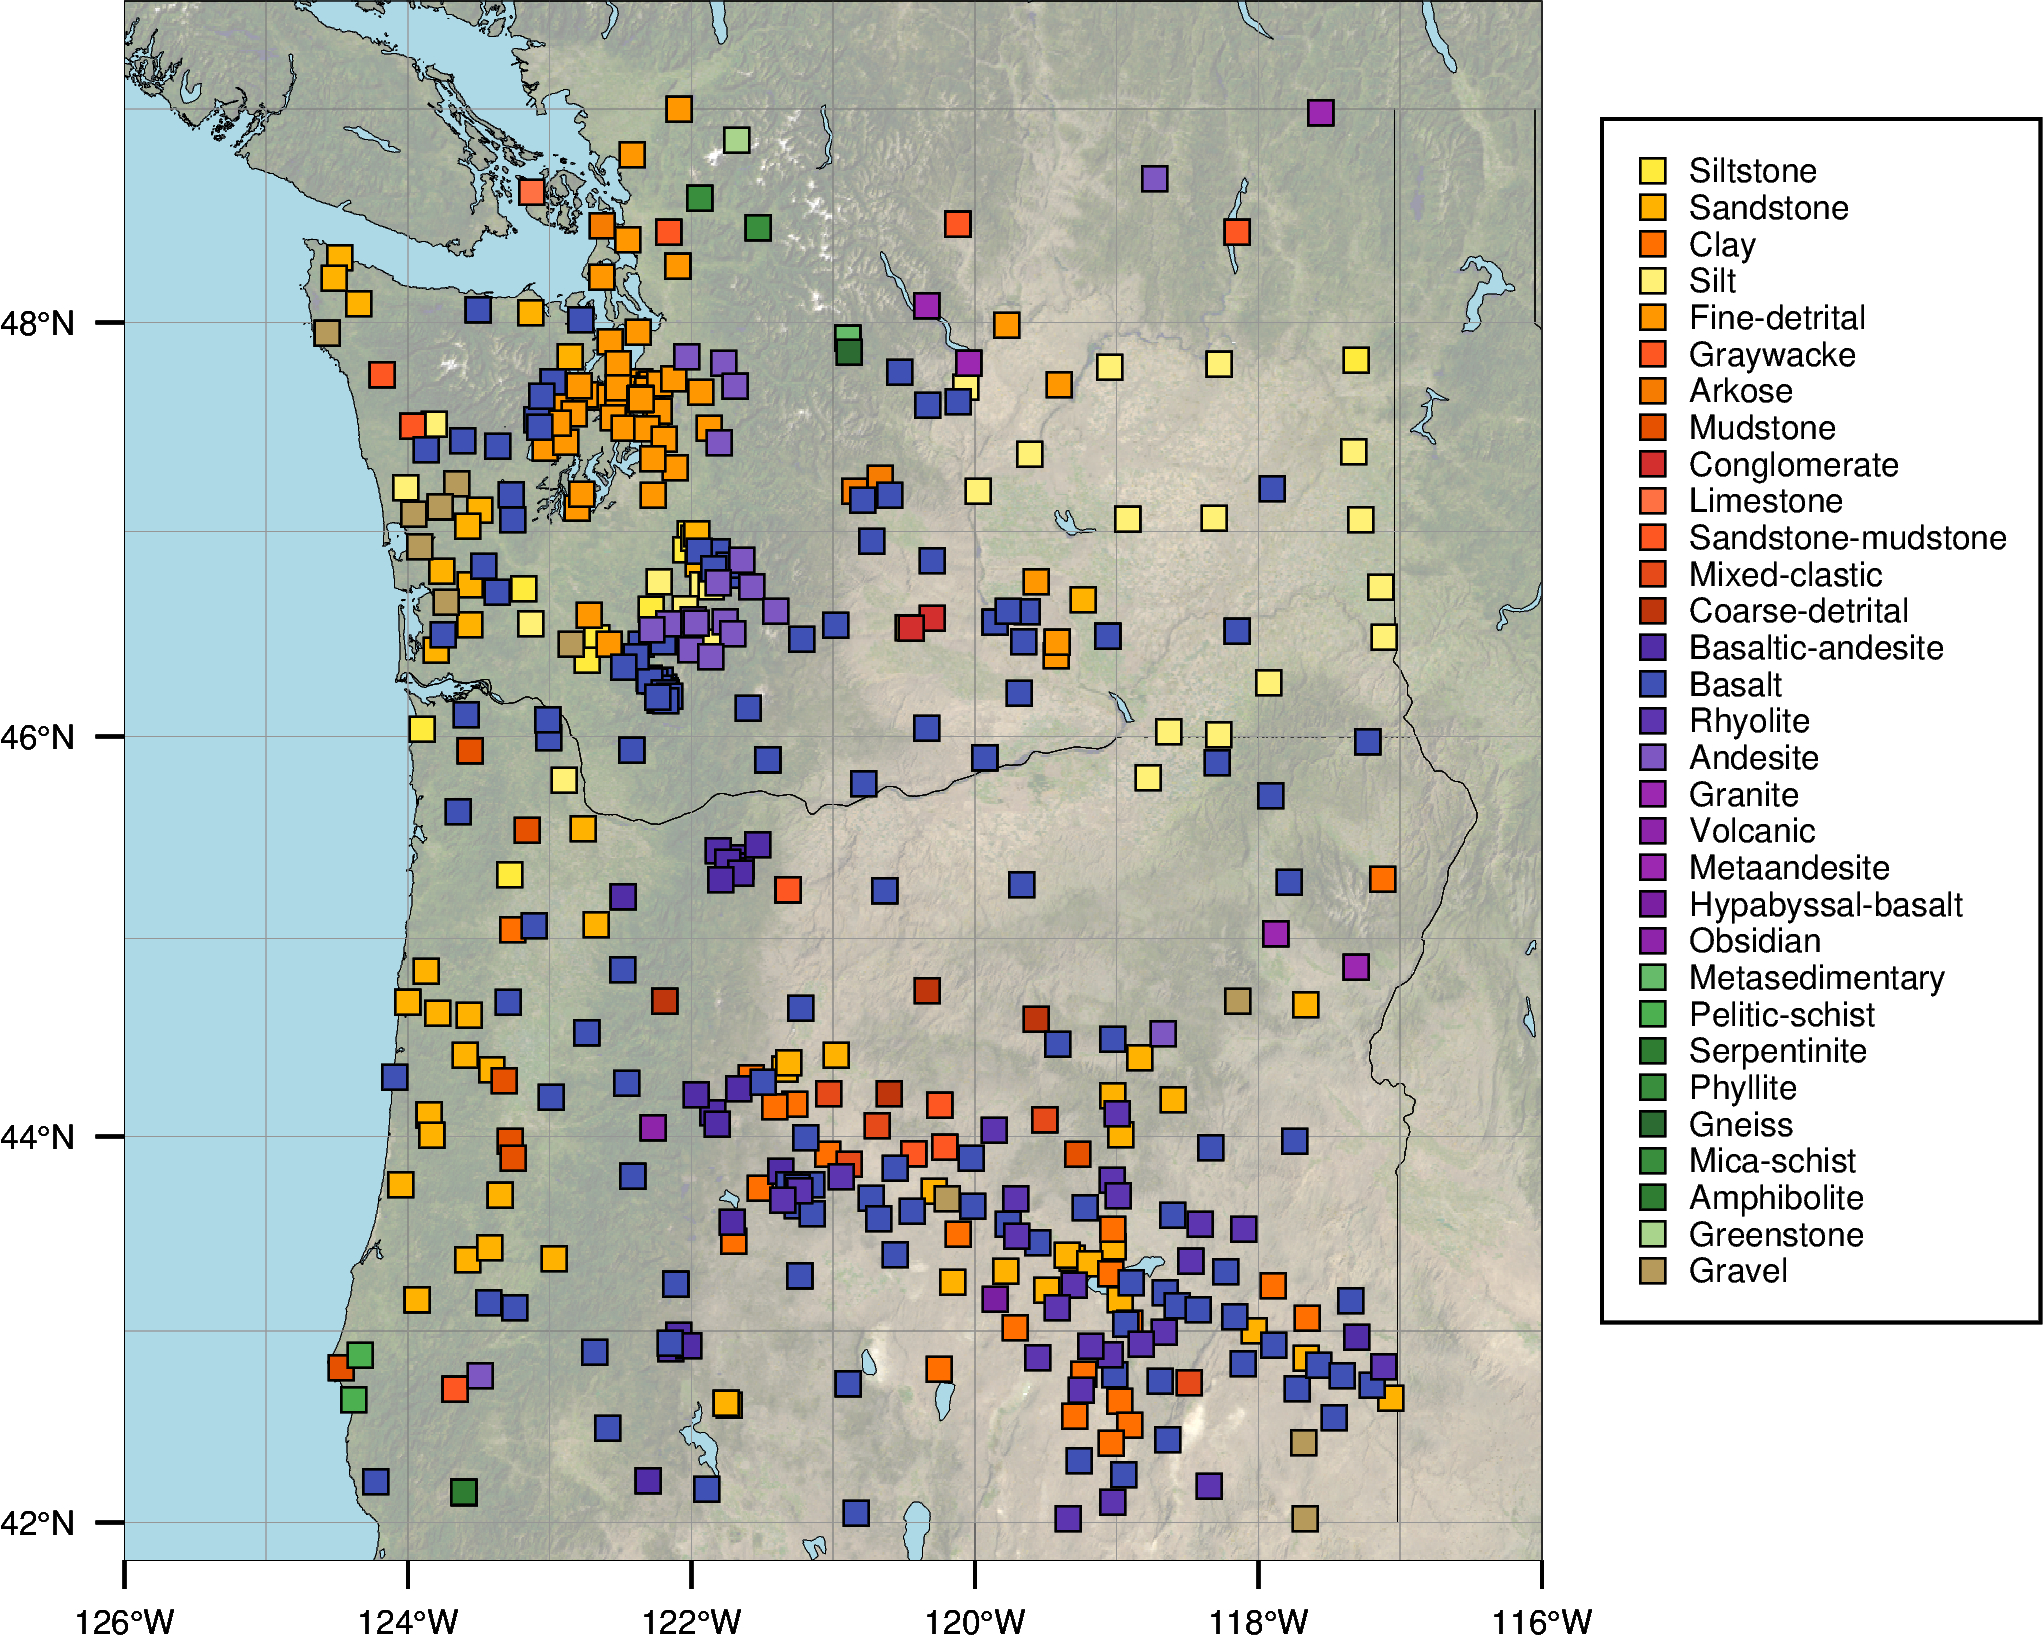

In [8]:
# Load CSV data
df = geo_major
region=[-126,-116,41.8,49.5]
proj='M6c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a2g1", )
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )

fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
            
# Plot each geological unit as colored circles
for unit, color in major_colors.items():
    geo_plot = geo_major[geo_major['color'] == color]
    if not geo_plot.empty:
        fig.plot(
                x=geo_plot['stlo'],
                y=geo_plot['stla'],
                style="s0.15c",  
                fill=color,
                pen="black",
                label=unit
                )

# Add a legend
fig.legend(position="JMR+o0.1i", box="+gwhite+p0.4p")
fig.show(dpi=600)


In [10]:
# import matplotlib.colors as mcolors
geo_color_palette = list(geo_colors.values())
major_color_palette = list(major_colors.values())


In [11]:
fn1='Annual_BBQ_comb.csv'
pd_pnwbb = pd.read_csv(fn1)

In [12]:
# Merging pd1 with pd2 on the 'netst' column
merged_geo = pd_pnwbb.merge(geo_df, on='netst', how='left')
merged_geo = merged_geo[merged_geo.meanb > 0.01]

# Display the merged DataFrame
merged_geo.to_csv('merged_geo.csv', index=False)

In [13]:
merged_geo.head(5)

fband    netst      stlo_x     stla_x     meanb    meanQ  ncount  \
0  0.5-1.0   LI.LTH -119.417679  46.461700  0.080000   58.905       2   
2  0.5-1.0  TA.I05A -121.267502  44.162601  0.316667   14.894       3   
5  0.5-1.0   XN.B05 -125.766998  58.930500  0.050000   94.248       1   
6  0.5-1.0   XN.B12 -131.744400  59.932999  0.110000   42.840       1   
7  0.5-1.0   XN.C02 -122.713898  58.096500  0.020000  235.619       1   

        Q-1      vs30  fmid      stlo_y     stla_y STATE  \
0  0.016976  266.2870  0.75 -119.417679  46.461700    WA   
2  0.067141  425.7540  0.75 -121.267502  44.162601    OR   
5  0.010610  324.2436  0.75         NaN        NaN   NaN   
6  0.023343  605.8344  0.75         NaN        NaN   NaN   
7  0.004244  426.8878  0.75         NaN        NaN   NaN   

                         GENERALIZE         MAJOR1  
0  Unconsolidated, undifferentiated  Fine-detrital  
2  Unconsolidated, undifferentiated           Clay  
5                               NaN            NaN  
6                               NaN            NaN  
7                               NaN            NaN

In [14]:
# Map geological units to colors
merged_geo['color_major'] = merged_geo['MAJOR1'].map(major_colors).fillna('#d3d3d3') 
merged_geo['color_gener'] = merged_geo['GENERALIZE'].map(geo_colors).fillna('#d3d3d3') 


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


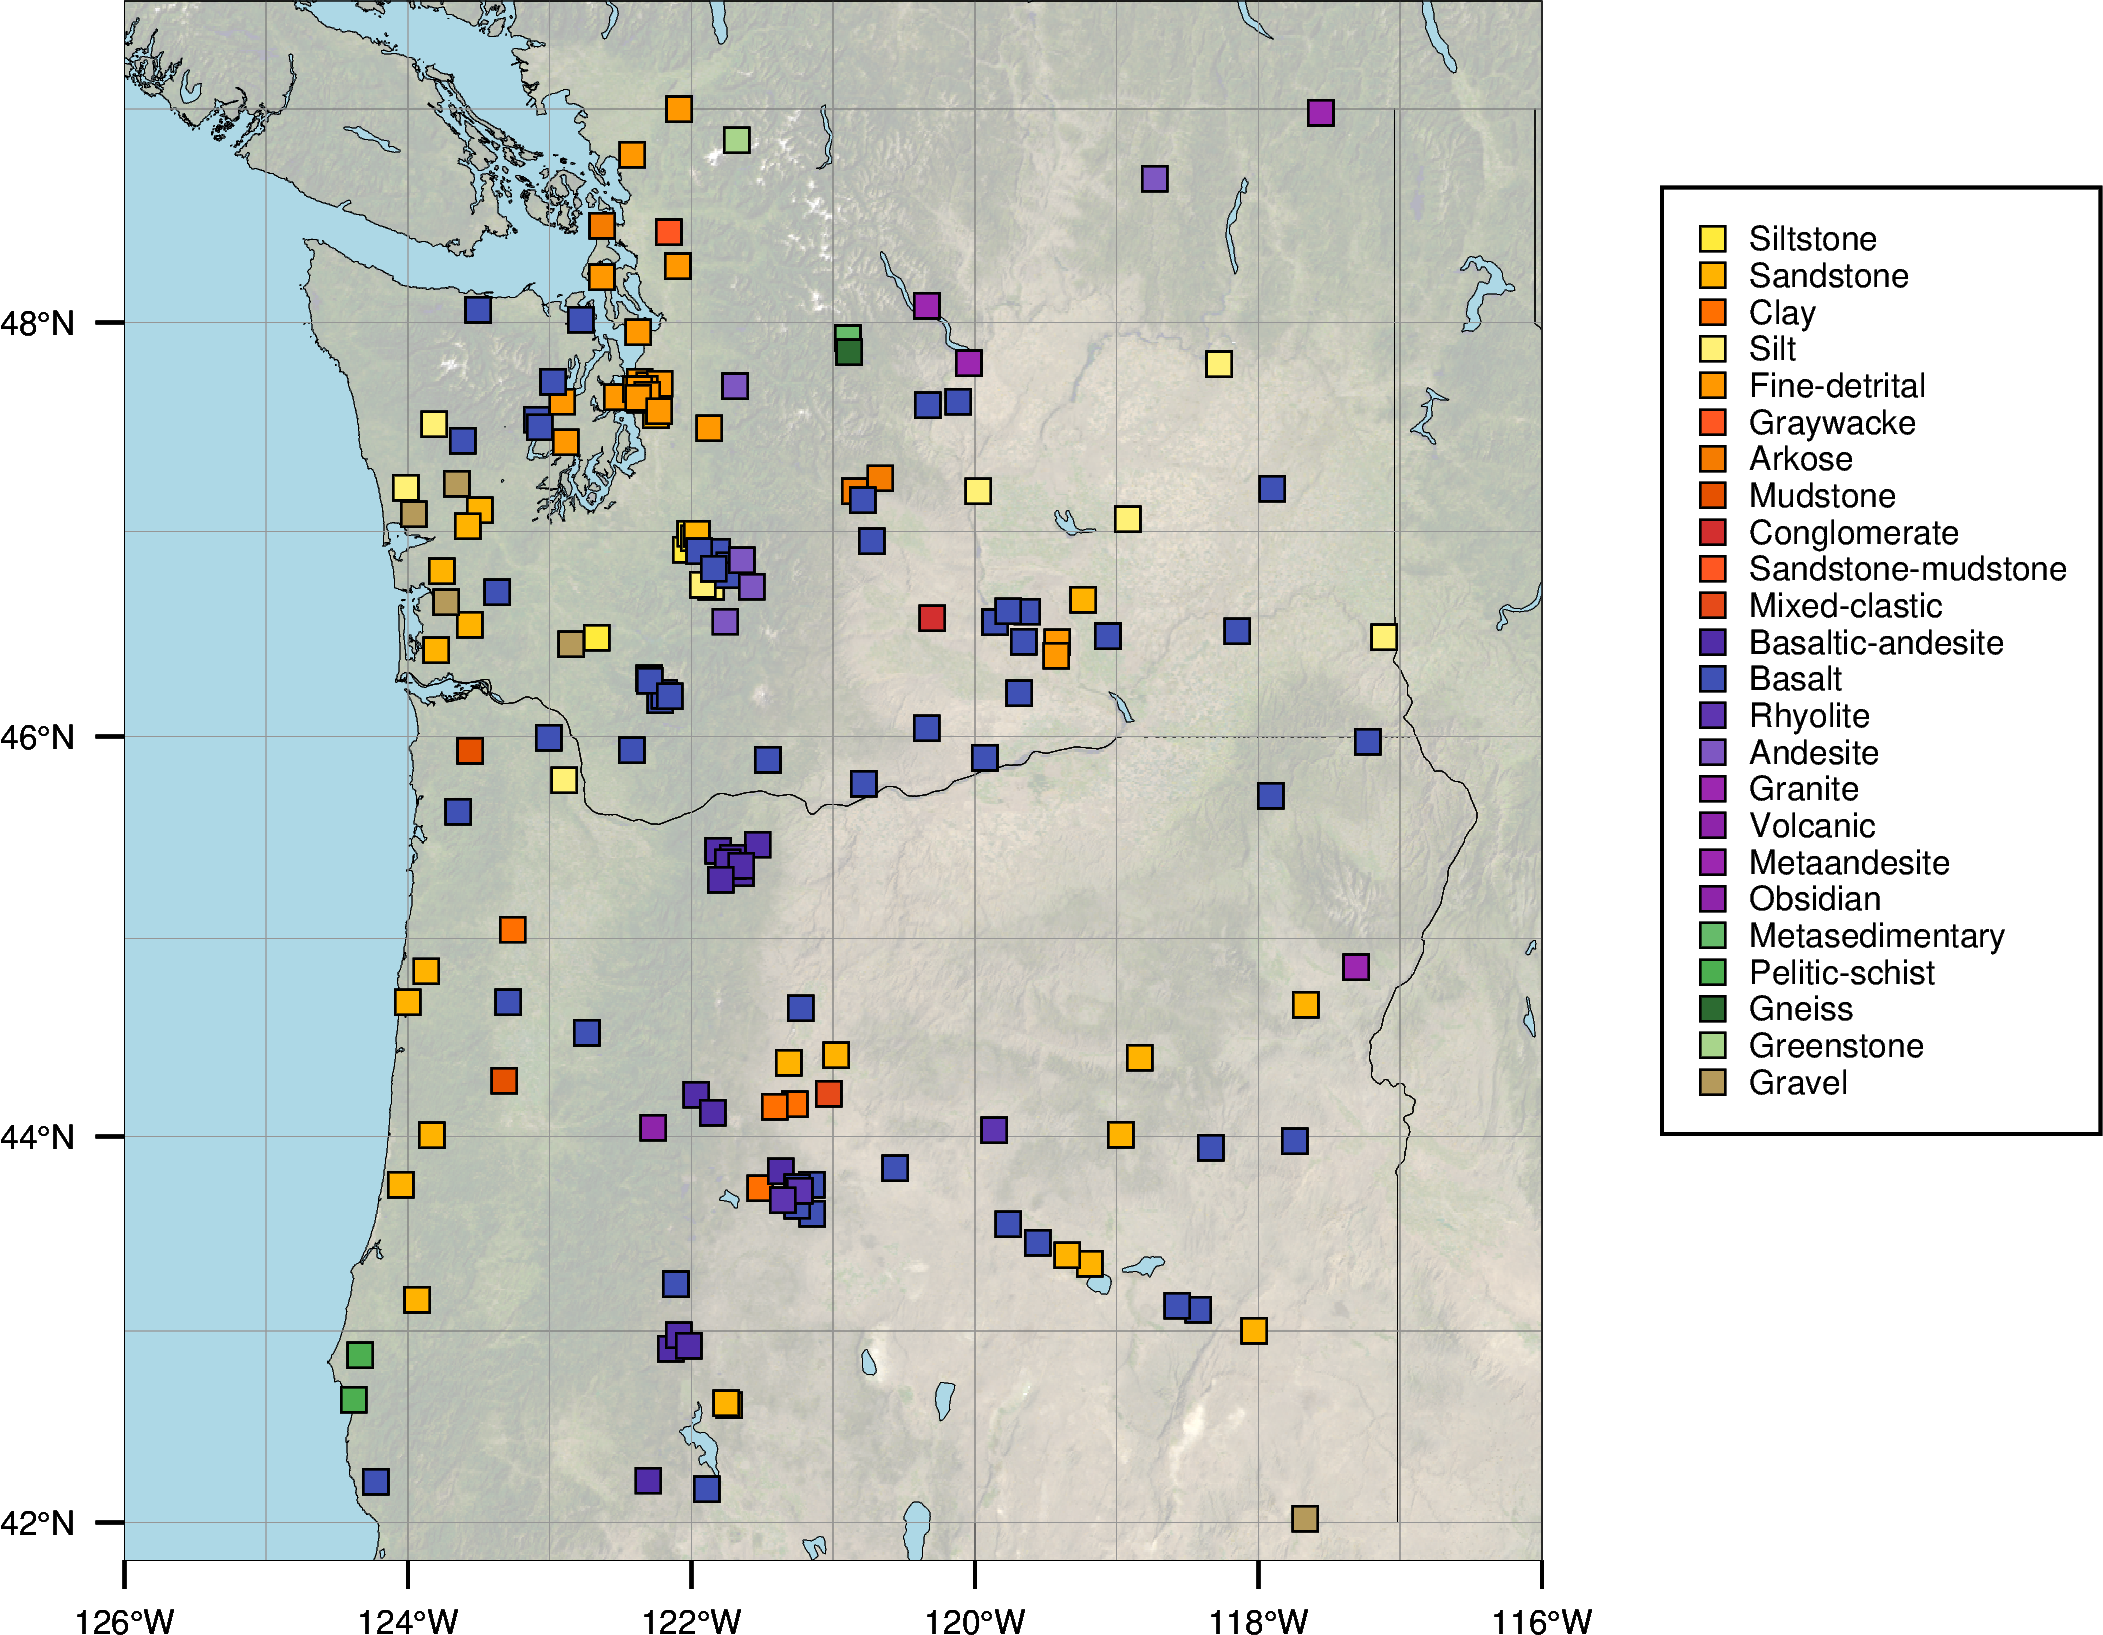

In [15]:
# Load CSV data
df = merged_geo

region=[-126,-116,41.8,49.5]
proj='M6c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a2g1", )
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=70, )

fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
            
# Plot each geological unit as colored circles
for unit, color in major_colors.items():
    geo_plot = df[df['color_major'] == color]
    if not geo_plot.empty:
        fig.plot(
                x=geo_plot['stlo_x'],
                y=geo_plot['stla_x'],
                style="s0.15c",  
                fill=color,
                pen="black",
                label=unit
                )
# Add a legend
fig.legend(position="JMR+o0.2i", box="+gwhite+p0.4p")
fig.show(dpi=600)


In [16]:
# -122, -121.4, 46.7, 47
MtRainer=merged_geo[(merged_geo.stlo_x >-122) & (merged_geo.stlo_x <-121.4) & (merged_geo.stla_x >46.7) & (merged_geo.stla_x <47)]
# -121.9, -121.4, 45, 45.5
MtHood=merged_geo[(merged_geo.stlo_x >-121.9) & (merged_geo.stlo_x <-121.4) & (merged_geo.stla_x >45) & (merged_geo.stla_x <45.5)]
# -122.4, -121.9, 46, 46.4
MtStHelens=merged_geo[(merged_geo.stlo_x >-122.5) & (merged_geo.stlo_x <-121.9) & (merged_geo.stla_x >46) & (merged_geo.stla_x <46.4)]


/tmp/ipykernel_504047/1888184412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Siltstone 3
Sandstone 3
Clay 0
Silt 6
Fine-detrital 0
Graywacke 0
Arkose 0
Mudstone 0
Conglomerate 0
Limestone 0
Sandstone-mudstone 0
Mixed-clastic 0
Coarse-detrital 0
Shale 0
Basaltic-andesite 0
Basalt 14
Rhyolite 0
Andesite 5
Granite 0
Volcanic 0
Metaandesite 0
Hypabyssal-basalt 0
Metavolcanic 0
Obsidian 0
Metasedimentary 0
Pelitic-schist 0
Serpentinite 0
Phyllite 0
Gneiss 0
Schist 0
Mica-schist 0
Slate 0
Metamorphic 0
Amphibolite 0
Water 0
Greenstone 0
Gravel 0


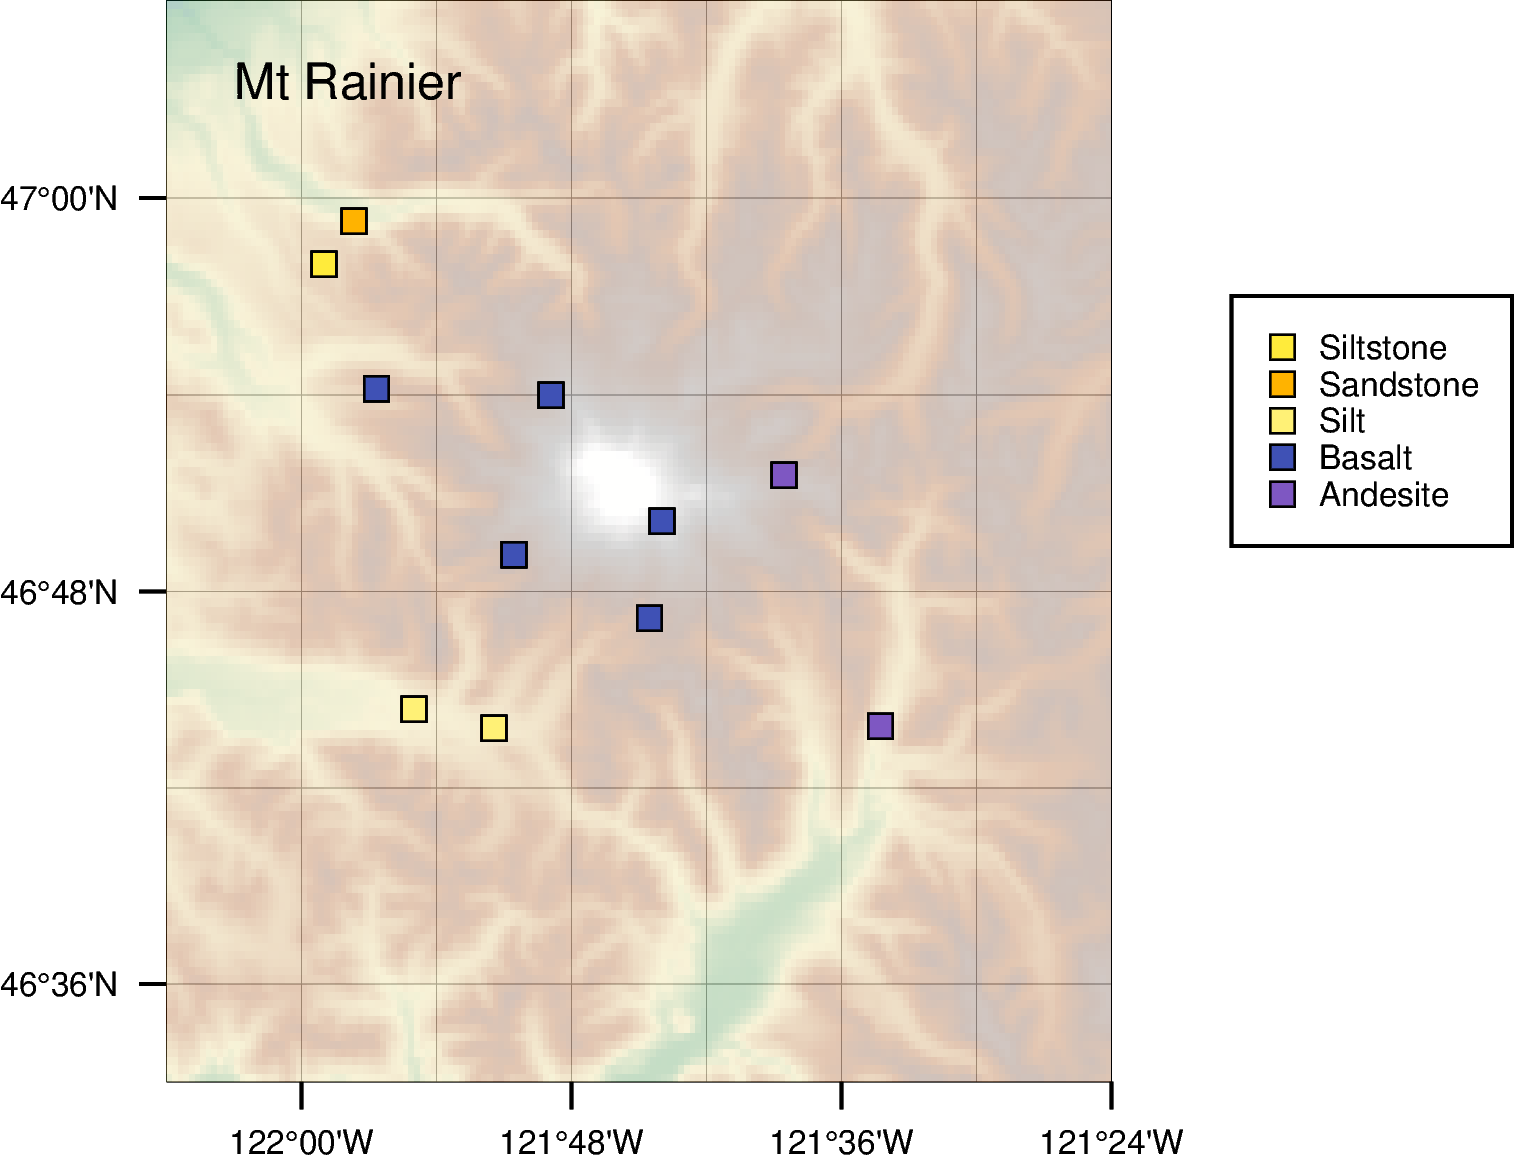

In [17]:
# Load CSV data
df = MtRainer
df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable

region=[-122.1, -121.4, 46.55, 47.1]
proj='M4c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a0.2g0.1", )
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
fig.grdimage(grid=grid, projection=proj, transparency=70, cmap='geo')
fig.text(x=-122.05,y=47.05,text=f'Mt Rainier', font="6p,Helvetica,0", no_clip=True, justify="BL" )
    
fig.coast(region=region, projection=proj,  resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)

# Plot each geological unit as colored circles
for unit, color in major_colors.items():
    geo_plot = df[df['color_major'] == color]
    print(unit, len(geo_plot))
    if not geo_plot.empty:
        fig.plot(
                x=geo_plot['stlo_x'],
                y=geo_plot['stla_x'],
                style="s0.15c",  
                fill=color,
                pen="black",
                label=unit
                )
# Add a legend
fig.legend(position="JMR+o0.2i", box="+gwhite+p0.4p")
fig.show(dpi=600)


/tmp/ipykernel_504047/2871166153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


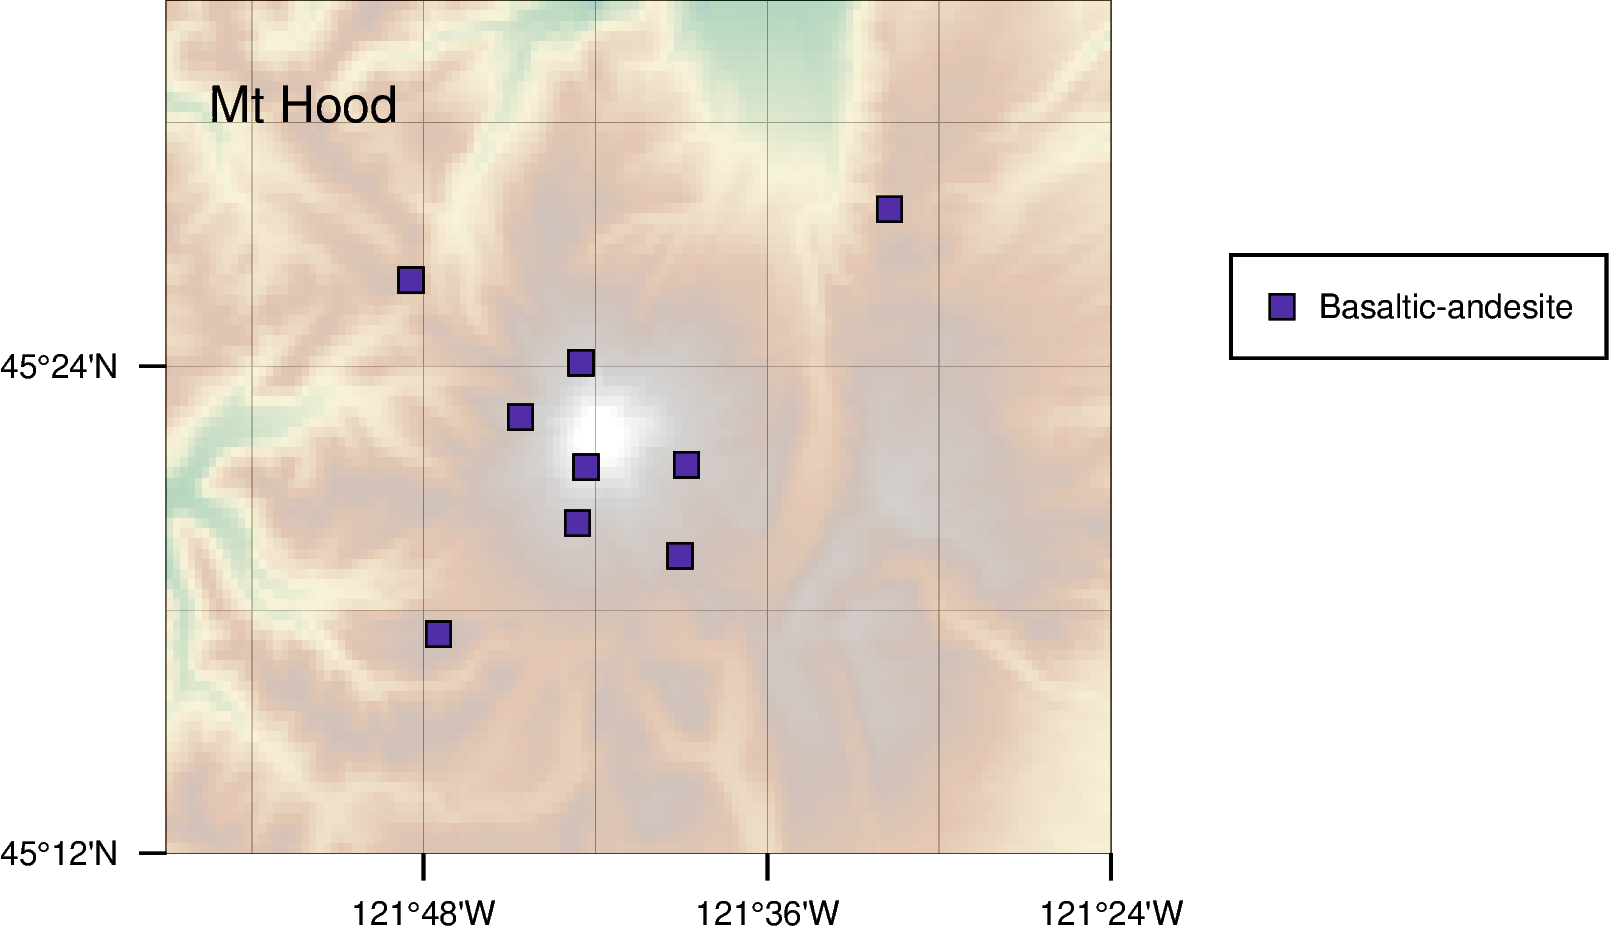

In [18]:
# Load CSV data
df = MtHood
df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable

region=[-121.95, -121.4, 45.2, 45.55]
proj='M4c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a0.2g0.1", )
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
fig.grdimage(grid=grid, projection=proj, transparency=70, cmap='geo')
fig.text(x=-121.925,y=45.5,text=f'Mt Hood', font="6p,Helvetica,0", no_clip=True, justify="BL" )

fig.coast(region=region, projection=proj,  resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
            
# Plot each geological unit as colored circles
for unit, color in major_colors.items():
    geo_plot = df[df['color_major'] == color]
    if not geo_plot.empty:
        fig.plot(
                x=geo_plot['stlo_x'],
                y=geo_plot['stla_x'],
                style="s0.15c",  
                fill=color,
                pen="black",
                label=unit
                )
# Add a legend
fig.legend(position="JMR+o0.2i", box="+gwhite+p0.4p")
fig.show(dpi=600)


/tmp/ipykernel_504047/3724418395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


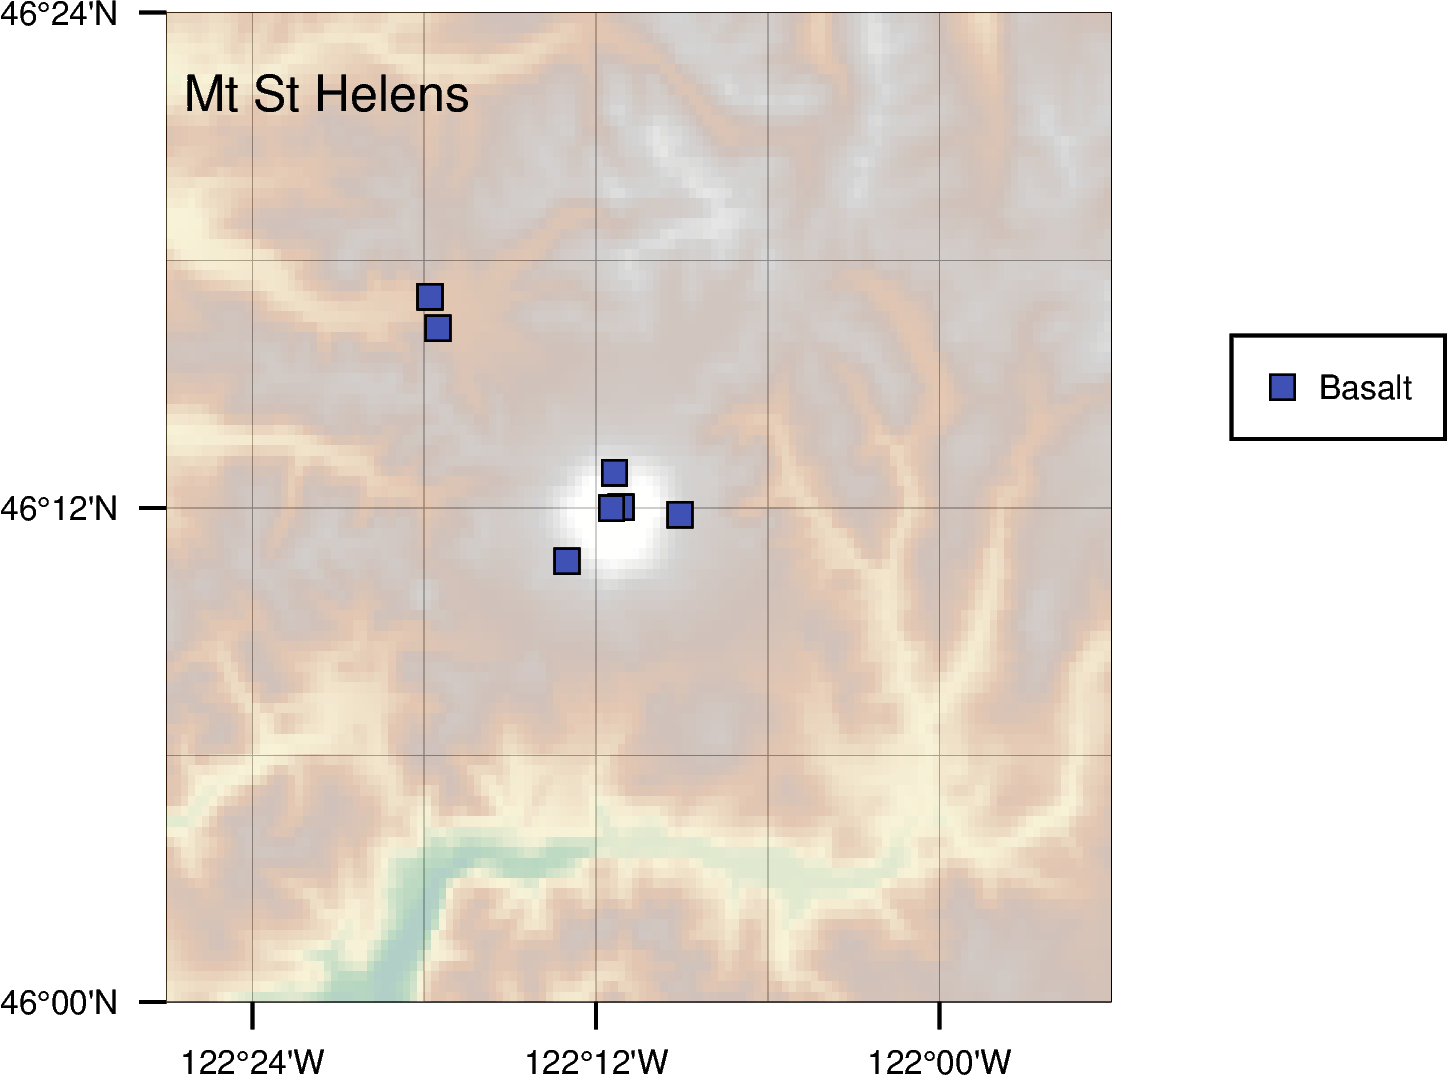

In [19]:
# Load CSV data
df = MtStHelens
df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable

region=[-122.45, -121.9, 46, 46.4]
proj='M4c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a0.2g0.1", )
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
fig.grdimage(grid=grid, projection=proj, transparency=70, cmap='geo')
fig.text(x=-122.44,y=46.36,text=f'Mt St Helens', font="6p,Helvetica,0", no_clip=True, justify="BL" )

fig.coast(region=region, projection=proj,  resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
            
# Plot each geological unit as colored circles
for unit, color in major_colors.items():
    geo_plot = df[df['color_major'] == color]
    if not geo_plot.empty:
        fig.plot(
                x=geo_plot['stlo_x'],
                y=geo_plot['stla_x'],
                style="s0.15c",  
                fill=color,
                pen="black",
                label=unit
                )
# Add a legend
fig.legend(position="JMR+o0.2i", box="+gwhite+p0.4p")
fig.show(dpi=600)


In [20]:
geo_filtered = merged_geo[merged_geo['MAJOR1'].map(merged_geo['MAJOR1'].value_counts()) > 3]

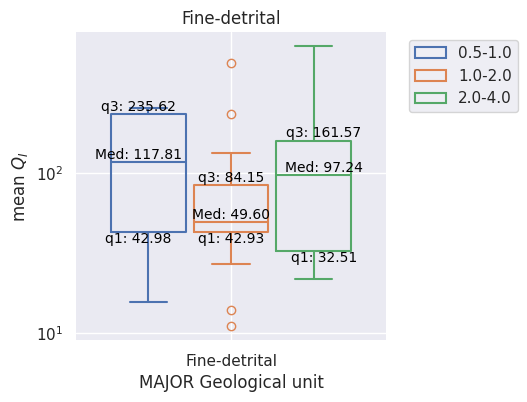

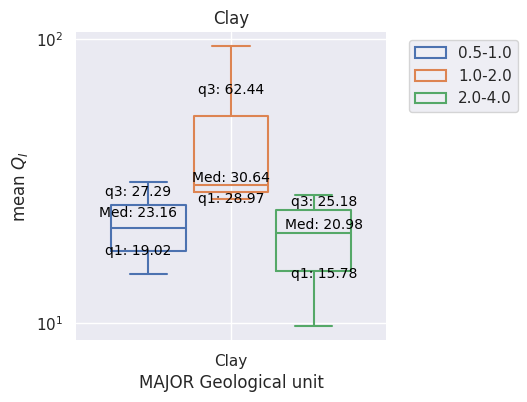

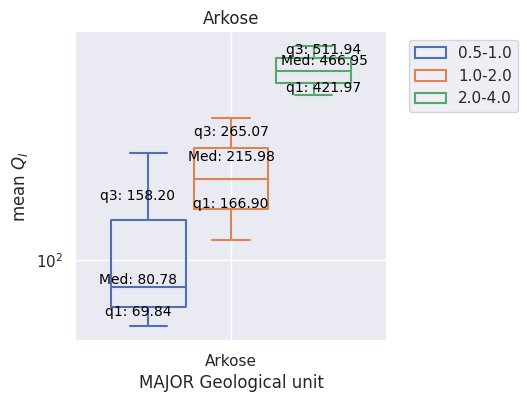

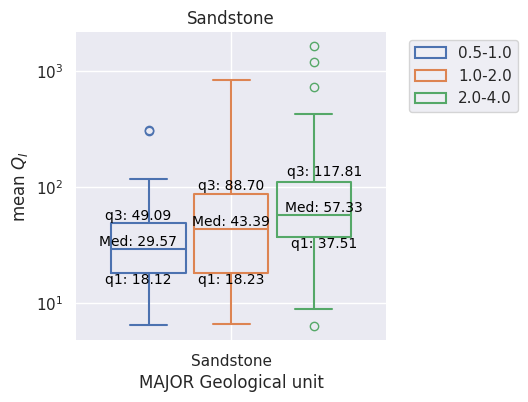

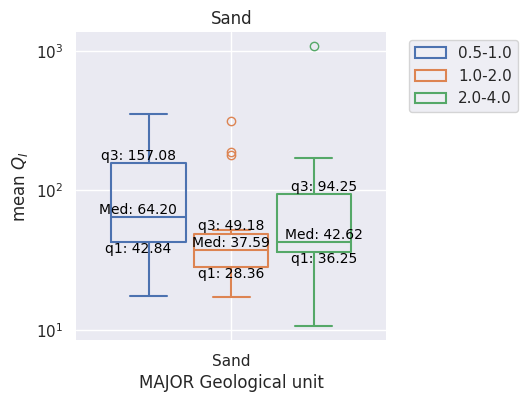

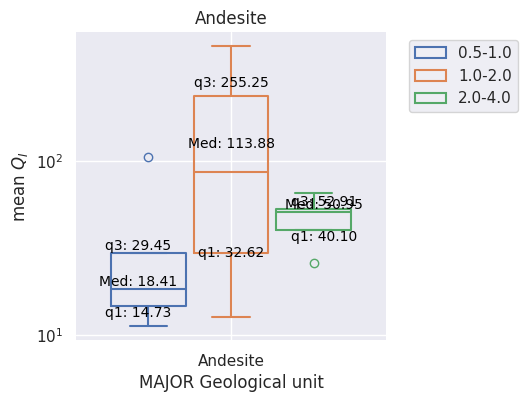

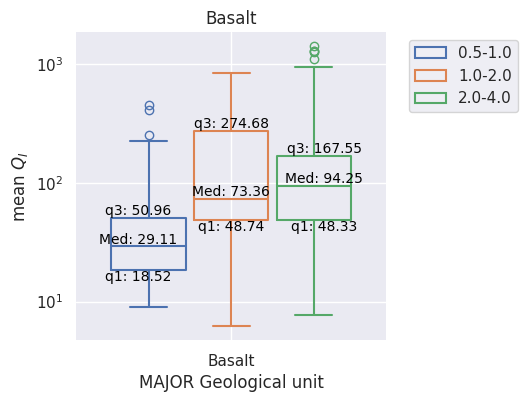

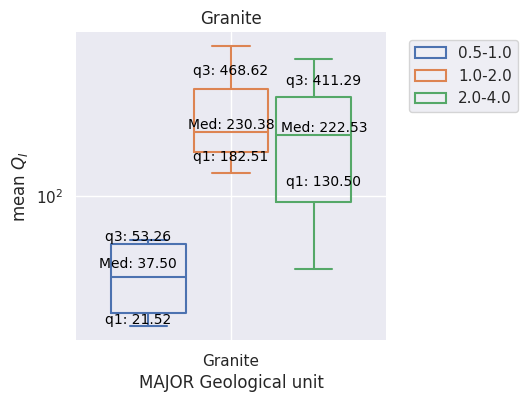

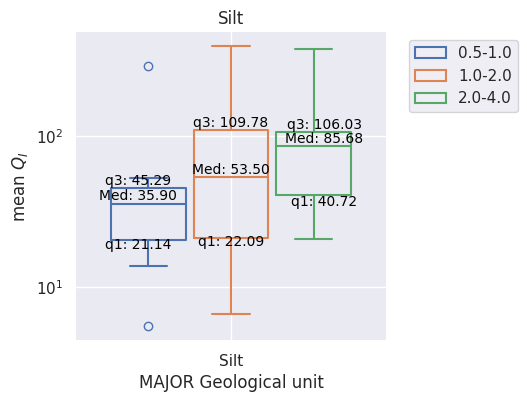

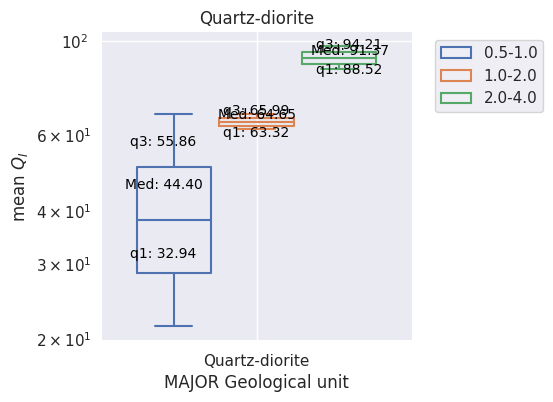

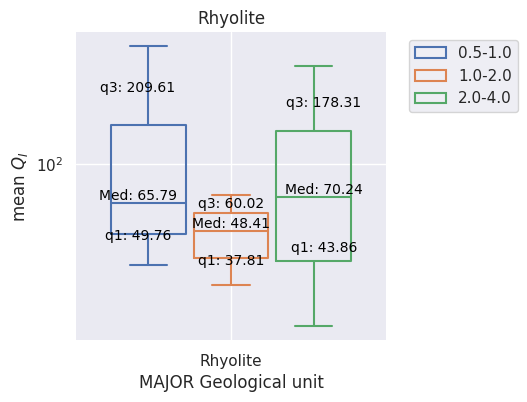

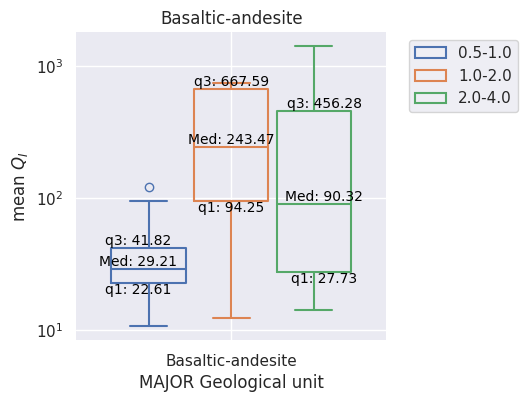

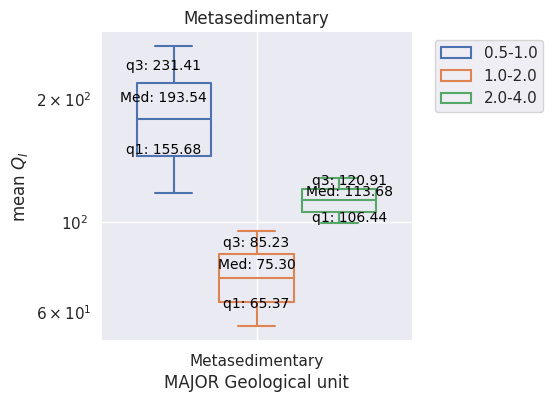

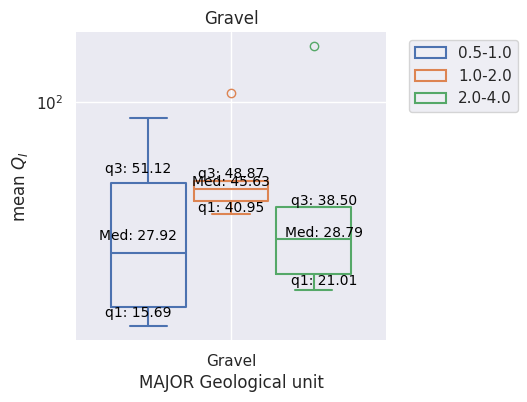

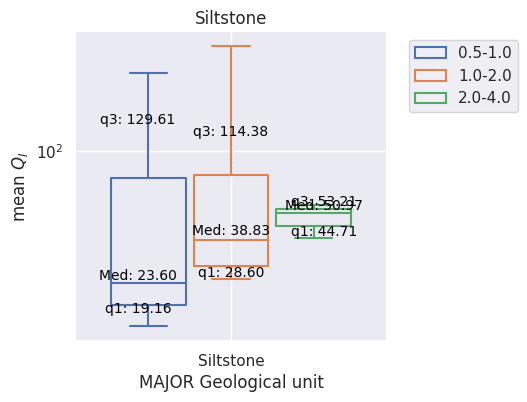

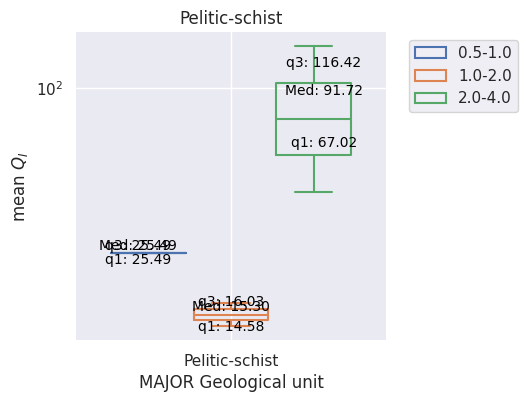

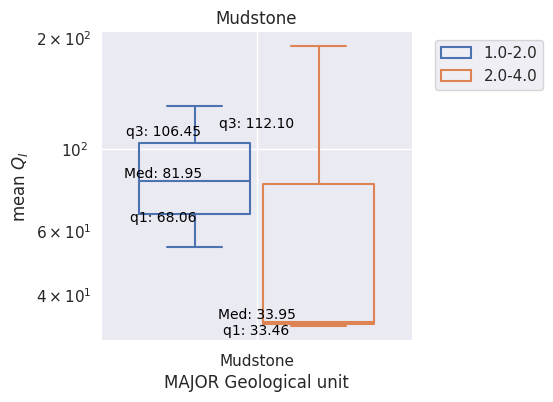

In [21]:
sns.set_theme()
for rock in geo_filtered['MAJOR1'].unique():
    data_geo = geo_filtered[geo_filtered['MAJOR1'] == rock]
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4,4))
    ax.set_yscale("log")
    sns.boxplot(data=data_geo, y="meanQ", x="MAJOR1", hue="fband", gap=0.1,
                 fill=False,
                )
    # sns.stripplot(data_geo, x="GENERALIZE", y="meanQ", hue="fband", size=2,)
    # sns.violinplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", fill=False,)
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        med = data_in['meanQ'].median()
        q1 = data_in['meanQ'].quantile(0.25)
        q3 = data_in['meanQ'].quantile(0.75)
        
        # Get the position on the x-axis for the current category
        xpos = n*0.3-0.3
        
        # Plot the mean and quartiles as text on the plot
        ax.text(xpos, med, f'Med: {med:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(xpos, q1, f'q1: {q1:.2f}', ha='center', va='top', color='black', fontsize=10)
        ax.text(xpos, q3, f'q3: {q3:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set(ylabel="mean $Q_I$", xlabel="MAJOR Geological unit", title=f'{rock}')
    sns.despine(trim=True, left=True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
    # plt.gcf().set_dpi(300)
    plt.show()


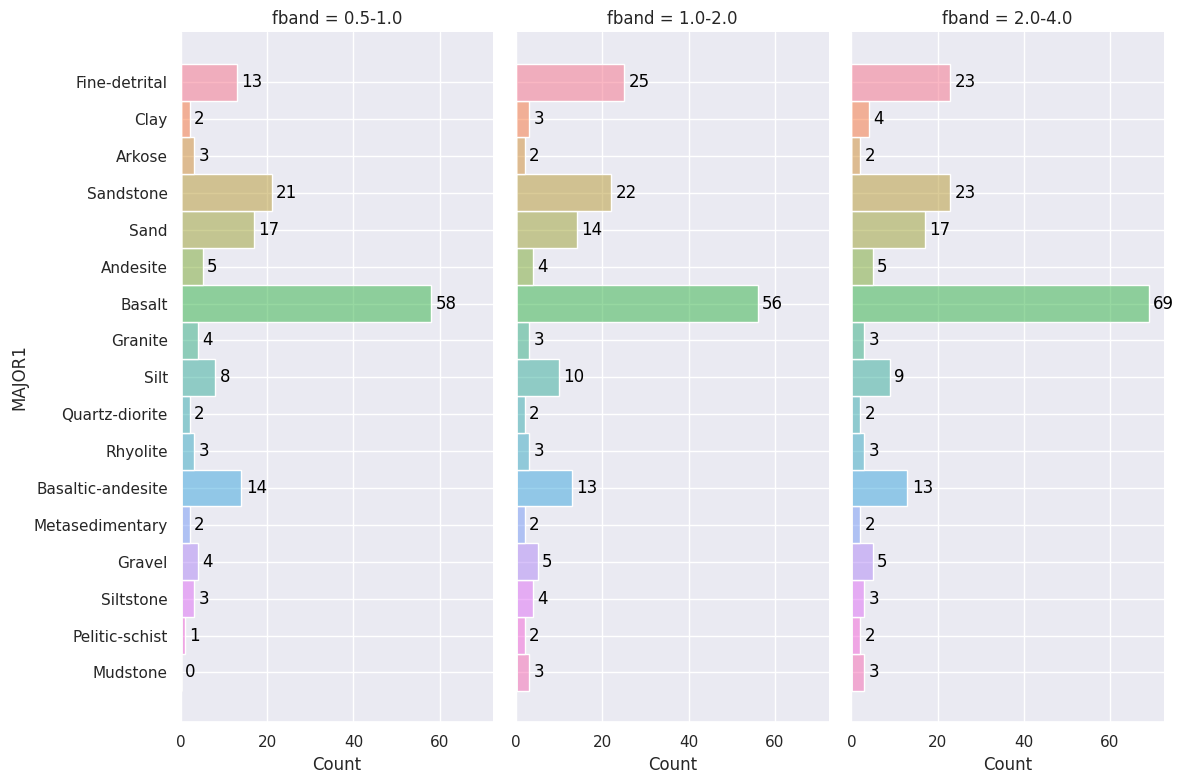

In [45]:
sns.set_theme()

g= sns.displot(
    geo_filtered, y="MAJOR1", hue="MAJOR1", col="fband", bins=1,
    binwidth=3, height=8, facet_kws=dict(margin_titles=True),legend=False,
    aspect=0.5, palette="husl"
)
original_order = geo_filtered['MAJOR1'].unique()
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['MAJOR1'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 1, i, f'{int(count)}', color='black', ha='left', va='center')
plt.tight_layout()


/tmp/ipykernel_504047/4097748256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_filtered['MAJOR1'] = pd.Categorical(geo_filtered['MAJOR1'], categories=original_order, ordered=True)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Fine-detrital with color #1f77b4
Plotting Clay with color #aec7e8
Plotting Arkose with color #ff7f0e
Plotting Sandstone with color #ffbb78
Plotting Sand with color #98df8a
Plotting Andesite with color #d62728
Plotting Basalt with color #ff9896
Plotting Granite with color #9467bd
Plotting Silt with color #8c564b
Plotting Quartz-diorite with color #c49c94
Plotting Rhyolite with color #e377c2
Plotting Basaltic-andesite with color #f7b6d2
Plotting Metasedimentary with color #c7c7c7
Plotting Gravel with color #bcbd22
Plotting Siltstone with color #dbdb8d
Plotting Pelitic-schist with color #17becf
Plotting Mudstone with color #9edae5


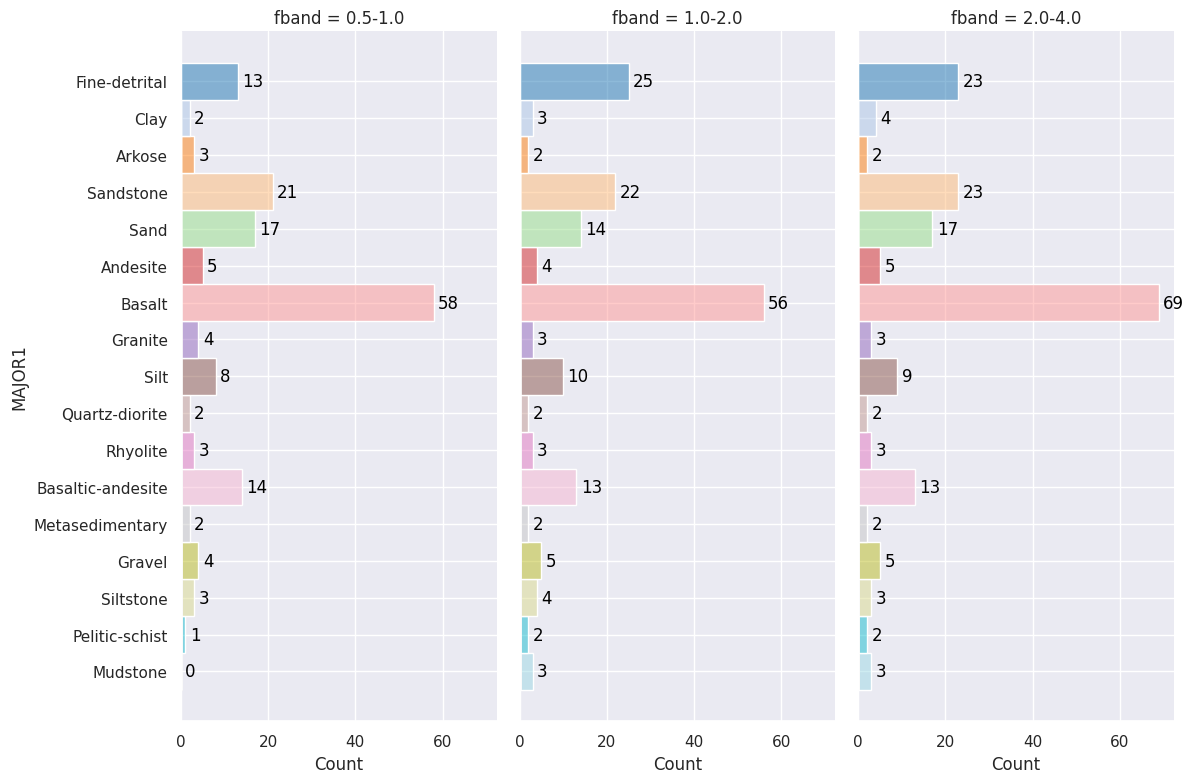

In [50]:
sns.set_theme()
# Step 1: Ensure 'GENERALIZE' is in its original order
original_order = geo_filtered['MAJOR1'].unique()
geo_filtered['MAJOR1'] = pd.Categorical(geo_filtered['MAJOR1'], categories=original_order, ordered=True)

# Step 2: Create a fixed color map dictionary based on the original order using a consistent color palette
cmap = plt.get_cmap('tab20', len(original_order))
color_map = {category: to_hex(cmap(i)[:3]) for i, category in enumerate(original_order)}

# Step 3: Plotting with Seaborn using the fixed color map
g = sns.displot(
    geo_filtered, y="MAJOR1", hue="MAJOR1", col="fband", bins=1,
    binwidth=3, height=8, facet_kws=dict(margin_titles=True), legend=False,
    aspect=0.5, palette=color_map  # Use the fixed color map here
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['MAJOR1'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 1, i, f'{int(count)}', color='black', ha='left', va='center')
        
# Step 4: Now plot the map with PyGMT using the same color mapping
region = [-126, -116, 41.8, 49.5]
proj = 'M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN='0.01p,150', MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p')

# Plot the basemap
fig.basemap(region=region, projection=proj, frame="a2g1")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
# Add coastlines and water
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p", water='lightblue', shorelines='0/0.1p')

# Plot each unique GENERALIZE category using the color map dictionary
for key in original_order:
    subset = geo_filtered[geo_filtered['MAJOR1'] == key]
    
    # Check if subset is not empty
    if not subset.empty:
        color = color_map[key]  # Use the fixed color for the category
        print(f"Plotting {key} with color {color}")
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Square style with size
            pen="0.1p,black",
            fill=color,
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
fig.savefig(fname='GEOunitmap_histo.png' , dpi=600)
plt.savefig(fname='GEOunit_histo.png' , dpi=600)

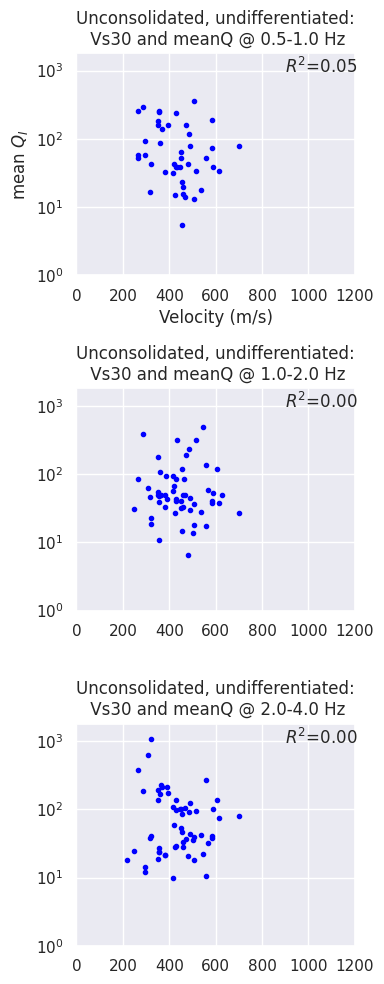

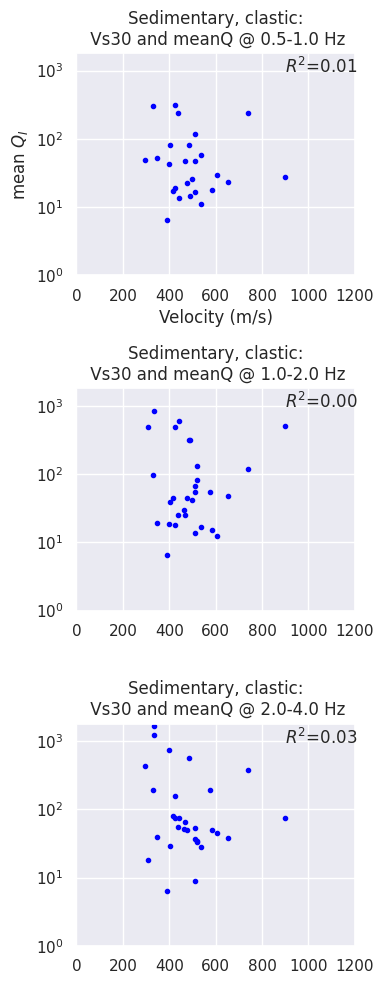

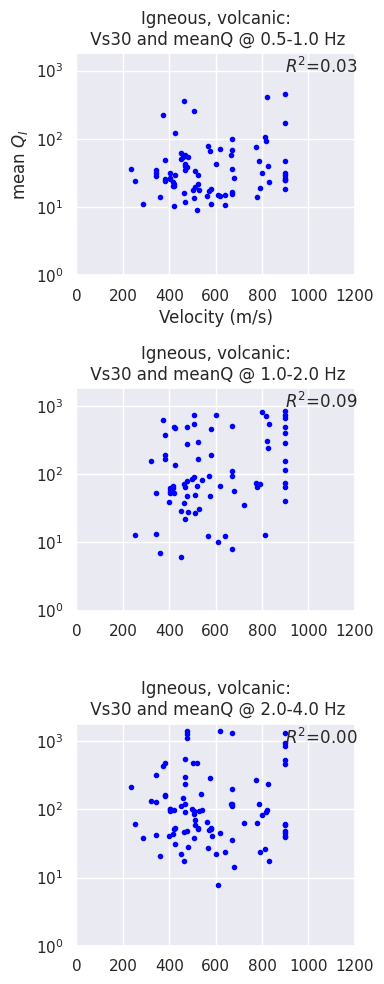

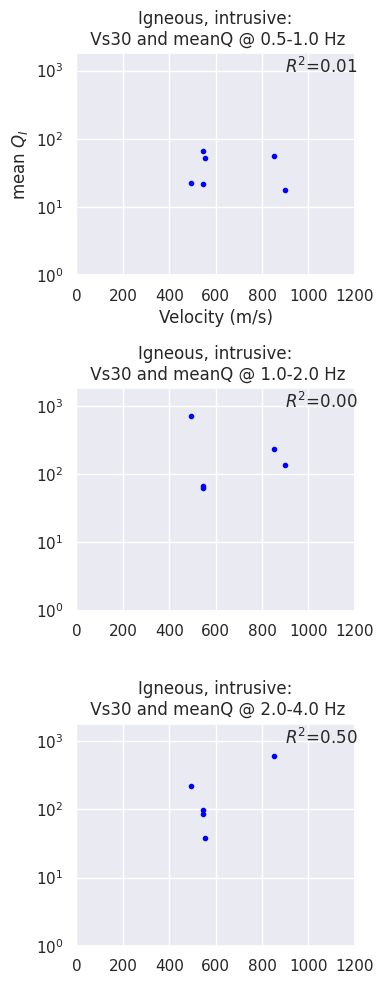

In [24]:


for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    data_geo = data_geo[(data_geo['GENERALIZE']== rock) & (data_geo['meanb'] > 0.01)]
    if len(data_geo) < 12:
        continue
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(3,1,figsize=(4,10))

    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        
        ax[n].set_yscale("log")
        ax[n].set_ylim(1,1800)
        ax[n].set_xlim(0,1200)
        
        ax[n].set_title(f'{rock}:\n Vs30 and meanQ @ {fb} Hz')        
        ax[n].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color='blue')        

        R0=np.corrcoef(data_in['vs30'],np.log(data_in['meanQ']))[0,1]
        ax[n].text(0.75,0.91,f'$R^2$={R0**2:.2f}',transform=ax[n].transAxes)
 

    ax[0].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    plt.tight_layout()
    
    


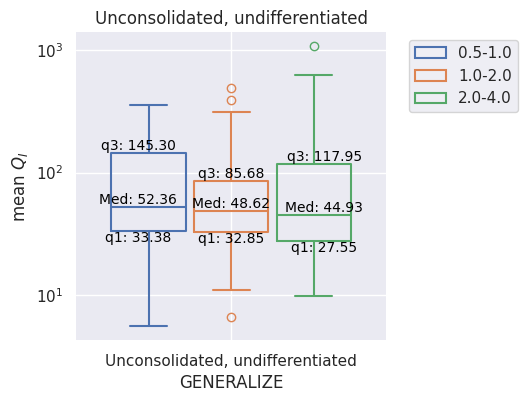

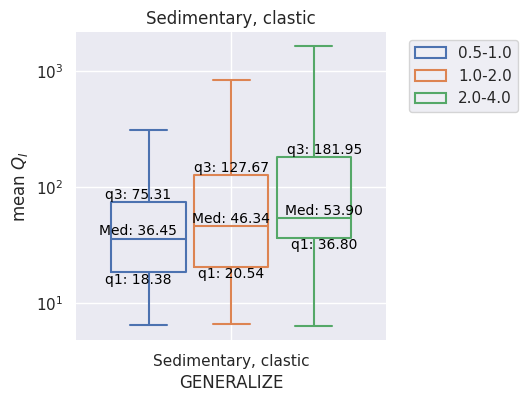

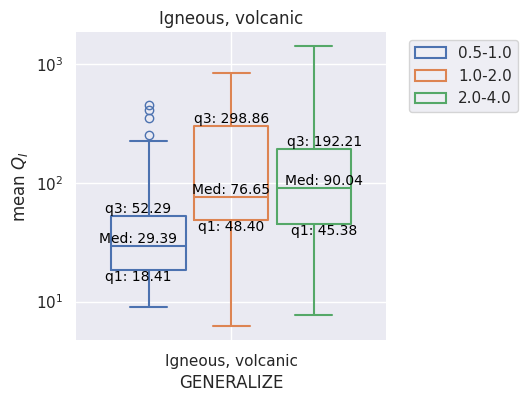

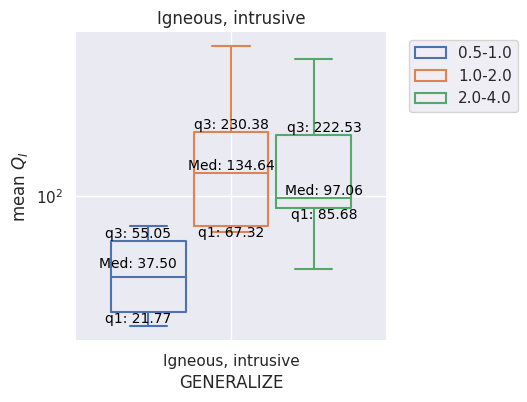

In [25]:
sns.set_theme()
for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    if len(data_geo) < 12:
        continue
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4,4))
    ax.set_yscale("log")
    sns.boxplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", gap=0.1,
                 fill=False,
                )
    # sns.stripplot(data_geo, x="GENERALIZE", y="meanQ", hue="fband", size=2,)
    # sns.violinplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", fill=False,)
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        med = data_in['meanQ'].median()
        q1 = data_in['meanQ'].quantile(0.25)
        q3 = data_in['meanQ'].quantile(0.75)
        
        # Get the position on the x-axis for the current category
        xpos = n*0.3-0.3
        
        # Plot the mean and quartiles as text on the plot
        ax.text(xpos, med, f'Med: {med:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(xpos, q1, f'q1: {q1:.2f}', ha='center', va='top', color='black', fontsize=10)
        ax.text(xpos, q3, f'q3: {q3:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set(ylabel="mean $Q_I$", xlabel="GENERALIZE", title=f'{rock}')
    sns.despine(trim=True, left=True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
    # plt.gcf().set_dpi(300)
    plt.show()


In [26]:
print(geo_filtered['MAJOR1'].unique().tolist())

['Fine-detrital', 'Clay', 'Arkose', 'Sandstone', 'Sand', 'Andesite', 'Basalt', 'Granite', 'Silt', 'Quartz-diorite', 'Rhyolite', 'Basaltic-andesite', 'Metasedimentary', 'Gravel', 'Siltstone', 'Pelitic-schist', 'Mudstone']


Gravel 0.5-1.0 4
Gravel 1.0-2.0 5
Gravel 2.0-4.0 5
Clay 0.5-1.0 2
Clay 1.0-2.0 3
Clay 2.0-4.0 4
Sand 0.5-1.0 17
Sand 1.0-2.0 14
Sand 2.0-4.0 17
Sandstone 0.5-1.0 21
Sandstone 1.0-2.0 22
Sandstone 2.0-4.0 23
Basaltic-andesite 0.5-1.0 14
Basaltic-andesite 1.0-2.0 13
Basaltic-andesite 2.0-4.0 13


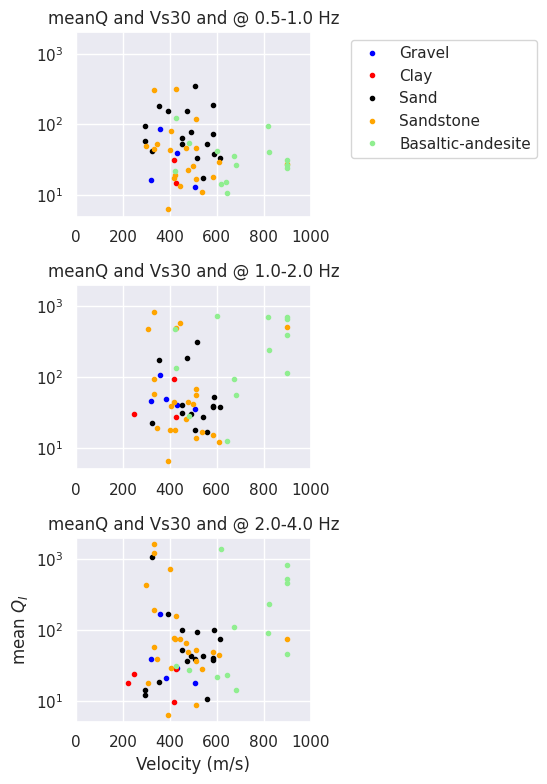

In [59]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(3,1,figsize=(4,8))

selected_rock = ['Gravel','Clay', 'Sand','Sandstone','Basaltic-andesite']
colors=['blue','red','black','orange','lightgreen']

for ktype, rock in enumerate(selected_rock):
    data_geo = geo_filtered[geo_filtered['MAJOR1'] == rock]
    data_geo = data_geo[data_geo['MAJOR1']== rock]
    color=colors[ktype]
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        print(rock, fb, len(data_in))
        
        ax[n].set_yscale("log")
        ax[n].set_ylim(5,2000)
        ax[n].set_xlim(0,1000)

        ax[n].set_title(f'meanQ and Vs30 and @ {fb} Hz')
        
        ax[n].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color=color)
        plt.tight_layout()
    ax[2].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    ax[0].legend(selected_rock, loc='upper right', bbox_to_anchor =(2, 1) ).get_frame().set_facecolor('white')
    

plt.show()



/tmp/ipykernel_504047/3830037807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_filtered['GENERALIZE'] = pd.Categorical(geo_filtered['GENERALIZE'], categories=original_order, ordered=True)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Unconsolidated, undifferentiated with color #1f77b4
Plotting Sedimentary, clastic with color #ff7f0e
Plotting Igneous, volcanic with color #d62728
Plotting Igneous, intrusive with color #8c564b
Plotting Metamorphic, sedimentary with color #e377c2
Plotting Unconsolidated and Sedimentary, undifferentiated with color #bcbd22
Plotting Metamorphic, schist with color #17becf


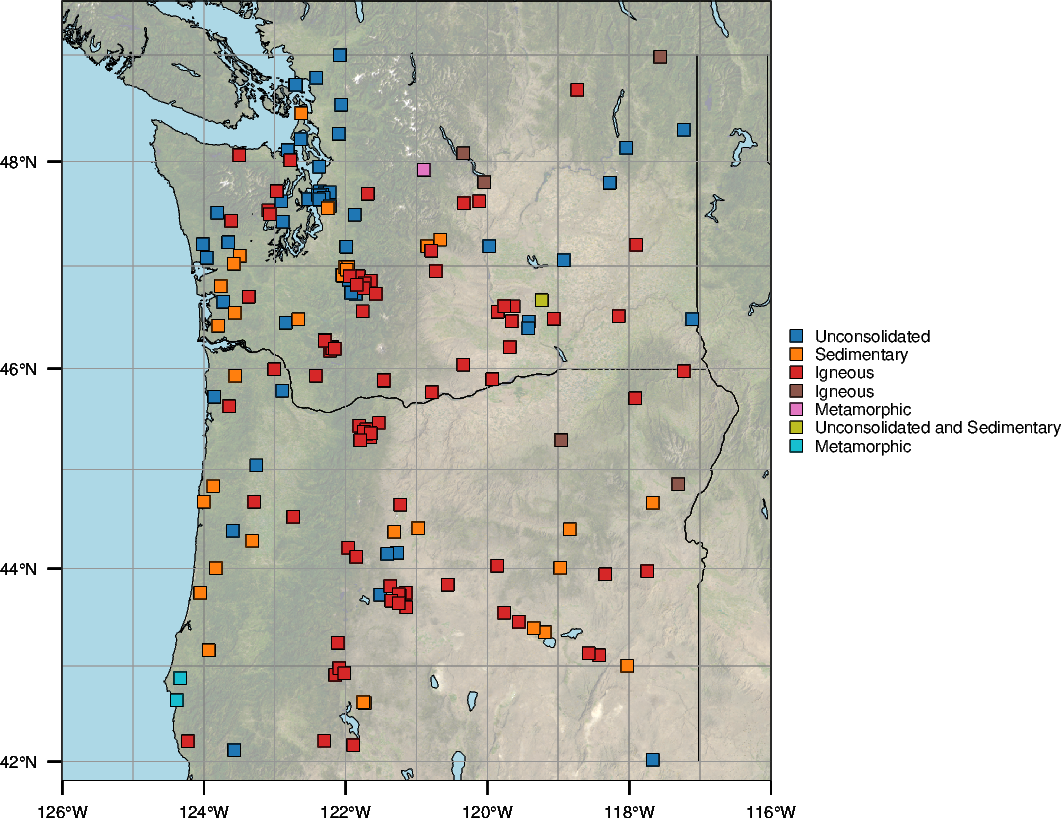

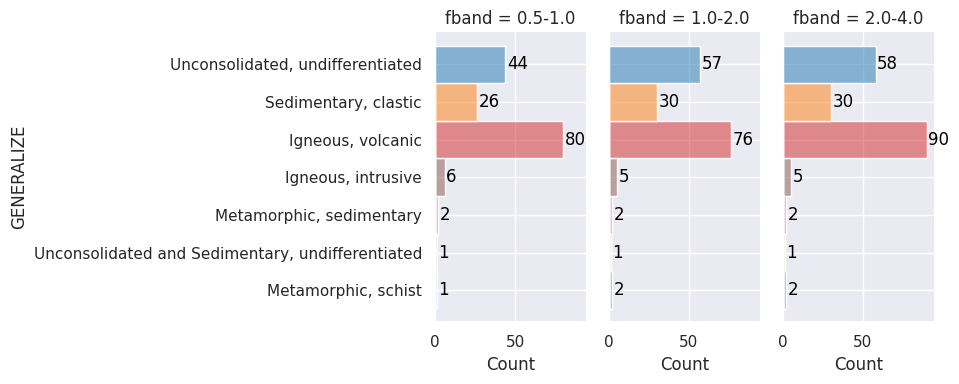

In [57]:
# Step 1: Ensure 'GENERALIZE' is in its original order
original_order = geo_filtered['GENERALIZE'].unique()
geo_filtered['GENERALIZE'] = pd.Categorical(geo_filtered['GENERALIZE'], categories=original_order, ordered=True)

# Step 2: Create a fixed color map dictionary based on the original order using a consistent color palette
cmap = plt.get_cmap('tab10', len(original_order))
color_map = {category: to_hex(cmap(i)[:3]) for i, category in enumerate(original_order)}

# Step 3: Plotting with Seaborn using the fixed color map
g = sns.displot(
    geo_filtered, y="GENERALIZE", hue="GENERALIZE", col="fband", bins=1,
    binwidth=3, height=4, facet_kws=dict(margin_titles=True), legend=False,
    aspect=0.8, palette=color_map  # Use the fixed color map here
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['GENERALIZE'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 1, i, f'{int(count)}', color='black', ha='left', va='center')
        
# Step 4: Now plot the map with PyGMT using the same color mapping
region = [-126, -116, 41.8, 49.5]
proj = 'M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN='0.01p,150', MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p')

# Plot the basemap
fig.basemap(region=region, projection=proj, frame="a2g1")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
# Add coastlines and water
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p", water='lightblue', shorelines='0/0.1p')

# Plot each unique GENERALIZE category using the color map dictionary
for key in original_order:
    subset = geo_filtered[geo_filtered['GENERALIZE'] == key]
    
    # Check if subset is not empty
    if not subset.empty:
        color = color_map[key]  # Use the fixed color for the category
        print(f"Plotting {key} with color {color}")
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Square style with size
            pen="0.1p,black",
            fill=color,
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
fig.show()
fig.savefig(fname='GEOgenermap_histo.png' , dpi=600)
plt.savefig(fname='GEOgener_histo.png' , dpi=600)